In [1]:
import numpy as np
import pickle
with open('data/reuters/reuters_triplets.p', 'rb') as f:
    x = pickle.load(f)

In [2]:
len(x)

20000

In [3]:
# Load tokenized reuters
topic2id = np.load('data/reuters/reuters_topic2id.npy').item(0)
id2topic = np.load('data/reuters/reuters_id2topic.npy').item(0)
topics = list(np.load('data/reuters/reuters_topics.npy'))

word2id = np.load('data/reuters/reuters_word2id.npy').item(0)
id2word = np.load('data/reuters/reuters_id2word.npy').item(0)
tokenized = list(np.load('data/reuters/reuters_tokenized.npy'))

In [7]:
from par2vec.graphvec import GraphVec
from par2vec.common import get_lapl

In [23]:
import tensorflow as tf

corpus = {'tokenized': tokenized, 'word2id': word2id}

# Initiate model
tf.reset_default_graph()
geo_vec_model = GraphVec(corpus=corpus, vocab_size=len(word2id),
                         h_layers=[128,64,8], learning_rate=1e-3,
                         act=tf.nn.relu, dropout=0,
                         pos_sample_size=2048,
                         embedding_size_w=128,
                         embedding_size_d=2,
                         n_neg_samples=64,
                         window_size=8,
                         window_batch_size=128,
                         friendly_print=False)

# Load model
# Start training
# print("TRAINING")
# geo_vec_model.train(10000, 10, 10000, save_name="test")
(A_o, A_i, L_o, L_i), idx_o, idx_i, val_o, val_i, train_dataset, train_labels = geo_vec_model.get_sample()
feed_dict = geo_vec_model.get_feed_dict(A_o, A_i, L_o, L_i, idx_o, idx_i, val_o, val_i, train_dataset, train_labels)
# outs = self.sess.run([self.opt_op, self.loss, self.aux_loss, self.accuracy], feed_dict=feed_dict)
a = geo_vec_model.sess.run(geo_vec_model.h, feed_dict=feed_dict)

/home/govert/anaconda3/envs/pytorch-par2vec/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
import tensorflow as tf
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

In [10]:
a = get_lapl(tokenized[:10], word2id).__next__()

dict_keys(['ex1b_900000loss', 'ex10b_705000loss', 'ex6b_900000loss', 'ex2b_900000loss'])


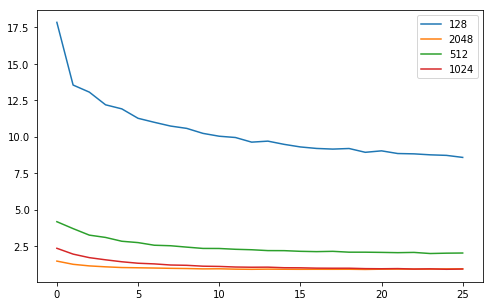

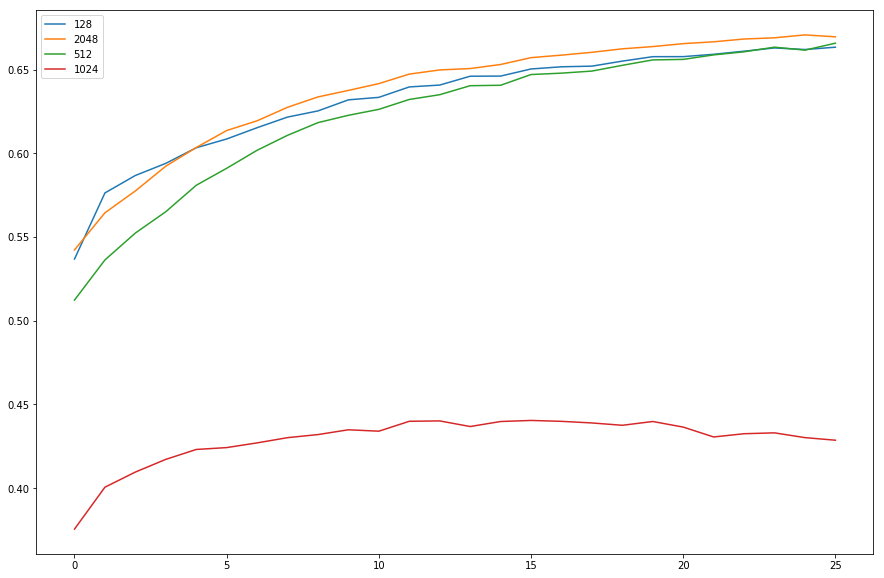

In [53]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
mypath = 'losses_accs'

losses = {}
accs = {}

for (dirpath, dirnames, filenames) in os.walk(mypath):
    for file in filenames:
        if 'ex1b' in file or 'ex2' in file or 'ex6' in file or 'ex10' in file:
            if 'loss' in file:
                losses[file] = np.mean(np.nan_to_num(np.load(os.path.join(mypath, file))).reshape(-1, 15000), axis=1)[:26]
            else:
                accs[file] = np.mean(np.load(os.path.join(mypath, file)).reshape(-1, 15000), axis=1)[:26]


plt.figure(1, (8,5))

l = ["128", "2048", "512", "1024"]
print(losses.keys())
for i, loss in enumerate(losses):   
    plt.plot(losses[loss], label=l[i])

plt.legend()
plt.show()

plt.figure(1, (15,10))
for i,acc in enumerate(accs):   
    plt.plot(accs[acc], label=l[i])

plt.legend()
plt.show()